In [60]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

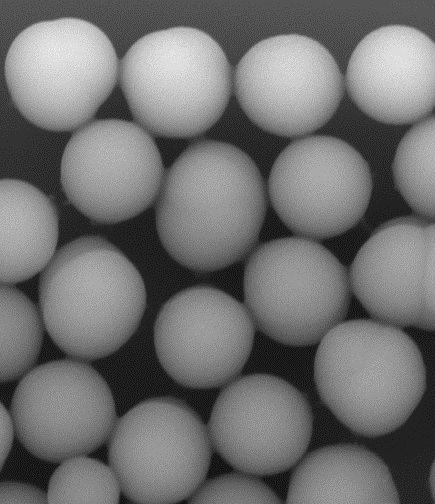

In [94]:
#image import using cv2
path = r'C:\Studies\ML & DA in Materials Science\Silica.jpg'
imgg = cv2.imread("Silica.jpg", 0) 
cv2_imshow(imgg)

In [95]:
#convert input into an array
A = np.asarray(imgg)
A.shape

(504, 435)

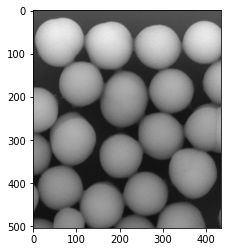

In [96]:
plt.imshow(A, cmap='gray')
plt.show()

In [108]:
#sharpening filter
Q1 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
Q1.shape

(3, 3)

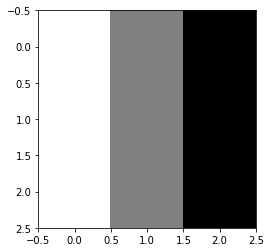

In [109]:
plt.imshow(Q1, cmap = 'gray')
plt.show()

In [110]:
#convolution function
def conv(A, Q, s = (1, 1)):
  m = A.shape[0]
  mm = Q.shape[0]
  n = A.shape[1]
  nn = Q.shape[1]

  output_shape =  (((int)((m - mm)/s[0] + 1), (int)((n - nn)/s[1] + 1)))
  C = np.zeros((output_shape))
  for i in range(output_shape[0]):
    for j in range(output_shape[1]):
      value = 0

      for v in range(Q.shape[0]):
        for w in range(Q.shape[1]):
          value += Q[v][w] * A[i*s[0] - v][j*s[1] - w]
      C[i][j] = value
  return C

<function matplotlib.pyplot.show>

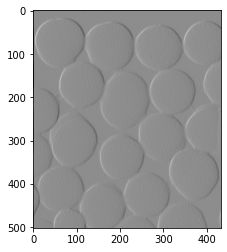

In [111]:
#convolution
C1 = conv(A, Q1)
plt.imshow(C1, cmap = 'gray')
plt.show

In [112]:
#crosscorrelation function
def crosscor(A, Q, s = (1, 1)):
  m = A.shape[0]
  mm = Q.shape[0]
  n = A.shape[1]
  nn = Q.shape[1]

  output_shape =  (((int)((m - mm)/s[0] + 1), (int)((n - nn)/s[1] + 1)))
  C = np.zeros((output_shape))
  for i in range(output_shape[0]):
    for j in range(output_shape[1]):
      value = 0

      for v in range(Q.shape[0]):
        for w in range(Q.shape[1]):
          value += Q[v][w] * A[i * s[0] + v][j * s[1] + w]
      C[i][j] = value
  return C

<function matplotlib.pyplot.show>

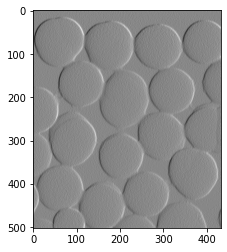

In [116]:
#crosscorrelation
C2 = crosscor(A, Q1)
plt.imshow(C2, cmap = 'gray')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


<function matplotlib.pyplot.show>

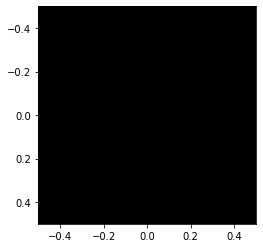

In [114]:
#autocorrelation
C3 = crosscor(A, A)
plt.imshow(C3, cmap = 'gray')
plt.show